# Naive Bayes Klassifikator
Als einführendes Beispiel wollen wir mit Hilfe des Naive-Bayes Klassifikators Obsorten, Äpfel und Birnen, andhand des Gewichts und Zuckergehalts klassifizieren.

Wir laden die Daten in ein Dataframe: Zuckergehalt und Gewicht von Äpfeln und Birnen:

In [42]:
import pandas as pd

url="https://raw.githubusercontent.com/troescherw/datasets/master/obst.csv"
df = pd.read_csv(url, delimiter=";")
df

,Zuckergehalt,Gewicht,Obstsorte
0,12.0,112,Apfel
1,10.0,100,Apfel
2,9.0,120,Apfel
3,12.0,119,Apfel
4,11.0,115,Apfel
5,13.0,113,Apfel
6,12.0,114,Apfel
7,15.0,150,Birne
8,16.0,149,Birne
9,14.0,147,Birne


Das Feature *Obstsorte* ist nominal skaliert. Deshalb ersetzen wir die String-Wert durch Dummys (One-Hot-Encoding):

In [43]:
df = pd.get_dummies(df, drop_first=True)
df

,Zuckergehalt,Gewicht,Obstsorte_Birne
0,12.0,112,0
1,10.0,100,0
2,9.0,120,0
3,12.0,119,0
4,11.0,115,0
5,13.0,113,0
6,12.0,114,0
7,15.0,150,1
8,16.0,149,1
9,14.0,147,1


**0** steht nun für **Apfel**, **1** für **Birne**. Beim **Naive Bayes Klassifikator** ist es übrigens nicht zwingend erforderlich (wie bei OLS), eine Kategorie zu entfernen, hab´s hier aber dennoch mal durchgeführt. Wir können nun unser Modell erstellen.

In [44]:
from sklearn.naive_bayes import GaussianNB

X = df[["Zuckergehalt", "Gewicht"]]
y = df.Obstsorte_Birne
model = GaussianNB().fit(X,y)

Mit Hilfe des Modells können wir nun zwei "unbekannte" Obststücke klassifiziert werden. Haben wir ein Stück Obst, das z.B. ein Zuckergehalt von 52,5g und ein Gewicht von 125g verfügt, fragen wir das Modell, ob es sich um einen Apfel oder eine Birne handelt:

In [45]:
unbekanntesObst = pd.DataFrame({"Zuckergehalt": [12.5], "Gewicht":[125]})
model.predict(unbekanntesObst)

array([0], dtype=uint8)

Das Modell gibt eine **0** zurück, damit handelt es sich um einen Apfel. Wir erstellen ein Scatterplot und fügen dort auch das unbekannte Stück Obst ein:

[]

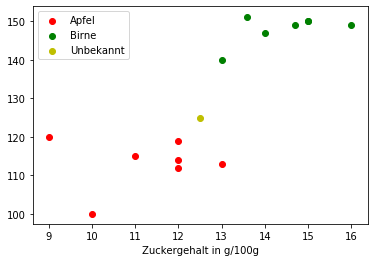

In [46]:
import matplotlib.pyplot as plt

plt.scatter(df[df.Obstsorte_Birne==0].Zuckergehalt, df[df.Obstsorte_Birne==0].Gewicht, c="r", label="Apfel")
plt.scatter(df[df.Obstsorte_Birne==1].Zuckergehalt, df[df.Obstsorte_Birne==1].Gewicht, c="g", label="Birne")
plt.scatter(unbekanntesObst.Zuckergehalt, unbekanntesObst.Gewicht, c="y", label="Unbekannt")
plt.xlabel("Zuckergehalt in g/100g")
plt.legend()
plt.plot()

## Beispiel: Naive-Bayes-Modell für die Vorhersage einer Diabetes-Erkrankung
Wir erstellen anhand des bereits verwendeten Datensatzes *Diabetes* voraus, ob ein Patient anhand der vorliegenden Daten an Diabetes erkranken wird. Um die Modellqualität zu prüfen führen wir eine k-Fold-Cross-Validation durch (mit k=10).

| Feature  | Bedeutung                                  |
|----------|--------------------------------------------|
| age      | age in years                               |
| sex      | sex (1 = male, 0 = female)                 |
| cp       | chest pain type                            |
| trestbps | resting blood pressure im mm Hg            |
| chol     | serum cholesteral in mg/dl                 |
| fbs      | fasting blood sugar > 120 mg/dl (1=true, 0=false)|
| thalach  | maximum heart rate achieved                |
| restecg  | resting electrocardiographic results       |
| exang    | exercise induced angina (0=no, 1=yes)      |
| oldpeak  | ST depression induced by exercise relative to rest|
| slope    | the slope of the peak exercise ST segment  |
| ca       | number of major vessels (0-3) colored by flouroscopy|
| thal     | 3=normal, 6=fixed defect, 7=reversable defect|
| target   | 1 or 0                                     |

Zuerst laden wir den Datensatz in ein Pandas DataFrame:

In [47]:
import pandas as pd
url="https://raw.githubusercontent.com/troescherw/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Wir splitten in X und y auf.

In [48]:
X = df.iloc[:,:12]
y = df.target

Wir teilen die Datensätze in 10 Folds auf.

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

Nun iterieren wir durch die Folds und trainieren das Modell jeweils mit den Daten in den Folds:

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

scores = [] # Leere Liste für Scores

for index_train, index_test in kf.split(X):
    X_train = X.iloc[index_train]
    X_test = X.iloc[index_test]
    y_train = y.iloc[index_train]
    y_test = y.iloc[index_test]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores


[0.8064516129032258,
 0.6774193548387096,
 0.8064516129032258,
 0.7333333333333333,
 0.9,
 0.9,
 0.8333333333333334,
 0.8333333333333334,
 0.8666666666666667,
 0.7333333333333333]

In [51]:
from statistics import mean
mean(scores)

0.8090322580645162